
1. Build a Deep Learning Model
2. Evaluate performance of the model


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get Dataset

In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
from google.colab import files

#pharma_df = pd.read_csv("pharma_treatment_data.csv")

uploaded = files.upload()
ls= list()
for fn in uploaded.keys():
  print('Uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
    # Read the uploaded file into a pandas dataframe
  df = pd.read_csv(fn)
  ls.append(df)

pharma_df = ls[0]
print(pharma_df)
#pharma_df = pd.read_csv(r'C:\Users\STSC\Desktop\BAN 674- Machine Learning\Assignment 2\pharma_treatment_data.csv')

Saving pharma_treatment_data.csv to pharma_treatment_data.csv
Uploaded file "pharma_treatment_data.csv" with length 2402883 bytes
      TreatmentGroup     PainLevel    Alpha1     Alpha2     Beta1     Beta2  \
0               Blue          Mild  0.074214   5.096620  1.744686  4.589163   
1                Red          Mild  0.111530   3.979562  0.373287  2.622809   
2               Blue      Moderate  0.818911  12.895712  2.617045  7.477602   
3               Blue          Mild  0.918583  77.740087  2.901908  7.051150   
4                Red      Moderate  0.379188  30.809089  1.707852  6.634164   
...              ...           ...       ...        ...       ...       ...   
19995            Red        Severe  2.783113   9.816909  3.872332  9.852071   
19996           Blue  NoneReported  1.032083   8.395431  2.265229  4.893741   
19997            Red        Severe  1.716579  56.301431  2.175184  8.855151   
19998          Green        Severe  0.261134  35.814815  2.327381  8.306430   
1

In [46]:
# Quick view of data
pharma_df = pharma_df.copy()
pharma_df.head()

,TreatmentGroup,PainLevel,Alpha1,Alpha2,Beta1,Beta2,Gamma,Target
0,Blue,1,0.074214,5.096620,1.744686,4.589163,3.411281,16.056673
1,Red,1,0.111530,3.979562,0.373287,2.622809,3.010454,15.612032
2,Blue,2,0.818911,12.895712,2.617045,7.477602,3.260009,14.427239
3,Blue,1,0.918583,77.740087,2.901908,7.051150,2.325070,20.174615
4,Red,2,0.379188,30.809089,1.707852,6.634164,2.862381,18.593337


In [4]:

negative_values = pharma_df['Target'].lt(0).any()

if negative_values:
  print("Target column contains negative values.")
else:
  print("Target column does not contain negative values.")


Target column contains negative values.


In [ ]:
# View data types
pharma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TreatmentGroup  20000 non-null  object 
 1   PainLevel       20000 non-null  object 
 2   Alpha1          20000 non-null  float64
 3   Alpha2          20000 non-null  float64
 4   Beta1           20000 non-null  float64
 5   Beta2           19000 non-null  float64
 6   Gamma           20000 non-null  float64
 7   Target          20000 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.2+ MB


In [ ]:
# Summary stats
pharma_df.describe()

,Alpha1,Alpha2,Beta1,Beta2,Gamma,Target
count,20000.000000,20000.000000,20000.000000,19000.000000,20000.000000,20000.000000
mean,1.004198,32.320023,2.016336,6.231148,4.493173,10.750530
std,1.005176,40.956733,0.979795,2.542104,1.643177,8.355719
min,0.000093,0.476824,0.000000,0.000000,1.089998,-24.723151
25%,0.291832,10.217084,1.331286,4.428389,2.992674,5.343551
50%,0.693262,19.958831,2.004306,6.198984,4.150281,11.773926
75%,1.388446,38.615177,2.693005,8.016739,5.986278,16.586815
max,9.207188,796.942215,5.784770,15.681265,8.956155,43.439917


In [ ]:
# unique values of TreatmentGroup
pharma_df["TreatmentGroup"].value_counts()

TreatmentGroup
Red      6724
Green    6680
Blue     6596
Name: count, dtype: int64

In [ ]:
# unique values of PainLevel
pharma_df["PainLevel"].value_counts()

PainLevel
Mild            8030
Moderate        6011
Severe          4014
NoneReported    1945
Name: count, dtype: int64

In [ ]:
# Missing values
pharma_df.isnull().sum()

TreatmentGroup       0
PainLevel            0
Alpha1               0
Alpha2               0
Beta1                0
Beta2             1000
Gamma                0
Target               0
dtype: int64

Data Preprocessing
Categorical/Ordinal Data

*PainLevel *TreatmentGroup
Catagorical/Ordinal Encoding Options

    Option: Target Encoding



In [47]:
#Creating mapper
scale_mapper= {"Mild":1 ,
               "Moderate":2,
               "Severe":3,
               "NoneReported": 4}
#Replacing feature values with scale
pharma_df["PainLevel"].replace(scale_mapper, inplace=True)

In [ ]:
pharma_df.head()

,TreatmentGroup,PainLevel,Alpha1,Alpha2,Beta1,Beta2,Gamma,Target
0,Blue,1,0.074214,5.096620,1.744686,4.589163,3.411281,16.056673
1,Red,1,0.111530,3.979562,0.373287,2.622809,3.010454,15.612032
2,Blue,2,0.818911,12.895712,2.617045,7.477602,3.260009,14.427239
3,Blue,1,0.918583,77.740087,2.901908,7.051150,2.325070,20.174615
4,Red,2,0.379188,30.809089,1.707852,6.634164,2.862381,18.593337


In [ ]:
# grouping Painlevel feature and applying mean of values
pharma_df.groupby("TreatmentGroup").mean()

,PainLevel,Alpha1,Alpha2,Beta1,Beta2,Gamma,Target
TreatmentGroup,,,,,,,
Blue,1.978169,0.990627,32.053616,2.018992,6.232950,4.502416,10.707125
Green,1.994611,1.025890,32.174218,2.019865,6.270791,4.489359,10.625666
Red,2.008031,0.995961,32.726210,2.010225,6.189905,4.487894,10.917155


Numerical Data Preprocessing

*Alpha1 - log- box-cox

*Alpha2- log- box-cox

*Beta1- bimodal- quantile

*Beta2- webull- box-cox

*Gamma- bimodal- quantile

*Target- None


In [48]:
#fitting after train-test splitting
def pipelines_fitting(X_train, y_train, preprocessing):
    X_train_processed = preprocessing.fit_transform(X_train, y_train)
    X_df = pd.DataFrame(
        X_train_processed,
        columns=preprocessing.get_feature_names_out(),
        index=X_train.index)
    return X_df

##Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Features are all columns except 'Target'
X = pharma_df.drop('Target', axis=1)
# Target variable is 'Target'
y = pharma_df['Target']

In [51]:
# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify the split
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (16000, 7)
X_test shape: (4000, 7)
y_train shape: (16000,)
y_test shape: (4000,)


##Pipelines and Transformations

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, OneHotEncoder, QuantileTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer


*Alpha1 - log- box-cox, *Alpha2- log- box-cox, *Beta1- bimodal- quantile, *Beta2- bimodal- box-cox, *Gamma- bimodal- quantile

In [53]:
quant_attribs = ["Gamma", "Beta1", "Beta2"]
log_attribs = ["Alpha1", "Alpha2"]
cat_attribs = ["TreatmentGroup"]
ord_attribs = ["PainLevel"]


log_pipeline = Pipeline([("log transform", PowerTransformer(method = 'box-cox')), ("min-max transform", MinMaxScaler())])
cat_pipeline = Pipeline([("categorical transform", OneHotEncoder(handle_unknown="ignore"))])
ord_pipeline = Pipeline([("min-max transform", MinMaxScaler())])
quantile_pipeline = Pipeline([("impute", SimpleImputer(missing_values=np.nan, strategy='mean')), ("quantile transformer", QuantileTransformer(n_quantiles=100)), ("min-max transform", MinMaxScaler())])


preprocessing = ColumnTransformer([
    ("quant", quantile_pipeline, quant_attribs),
    ("logdist", log_pipeline, log_attribs),
    ("categorical", cat_pipeline, cat_attribs),
    ("ordinal", ord_pipeline, ord_attribs),
])

In [54]:
# Preprocess data
X_train_prep = preprocessing.fit_transform(X_train)
X_test_prep = preprocessing.transform(X_test)


In [55]:
# Create a dataframe from the preprocessed data
X_train_prep = pd.DataFrame(X_train_prep, columns=preprocessing.get_feature_names_out())
X_test_prep = pd.DataFrame(X_test_prep, columns=preprocessing.get_feature_names_out())

In [56]:
X_train_prep.head()

,quant__Gamma,quant__Beta1,quant__Beta2,logdist__Alpha1,logdist__Alpha2,categorical__TreatmentGroup_Blue,categorical__TreatmentGroup_Green,categorical__TreatmentGroup_Red,ordinal__PainLevel
0,0.314125,0.068749,0.664274,0.666202,0.327514,0.0,1.0,0.0,0.666667
1,0.406171,0.051888,0.637632,0.258422,0.465338,1.0,0.0,0.0,0.666667
2,0.422871,0.914159,0.820415,0.602422,0.549383,0.0,1.0,0.0,0.000000
3,0.114939,0.035306,0.066583,0.324754,0.479633,0.0,0.0,1.0,0.000000
4,0.090969,0.749682,0.467525,0.747619,0.540341,0.0,1.0,0.0,0.000000


In [57]:
X_train_prep.shape

(16000, 9)

# Building Deep Learning Models


## Building models with Tensorflow/Keras API

In [3]:
!pip install tensorflow==2.10

ERROR: Could not find a version that satisfies the requirement tensorflow==2.10 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0)
ERROR: No matching distribution found for tensorflow==2.10


In [2]:
# import tensorflow and keras libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.losses import Huber
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.initializers import LecunNormal
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout

ImportError: cannot import name 'get_model_proto' from 'tensorflow.python.data.experimental.ops.iterator_ops' (C:\Users\STSC\anaconda3\Lib\site-packages\tensorflow\python\data\experimental\ops\iterator_ops.py)

In [59]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

#EPOCHS = 50
tf.random. set_seed(1)

In [60]:
models =[

      #using relu activation fn, adam initialiser, 5 layers
      keras.Sequential([
          layers.Dense(256, activation="relu", input_shape = (X_train_prep.shape[1],), name="layer1"),
          layers.Dense(128, activation="relu", name="layer2"),
          layers.Dense(64, activation="relu", name="layer3"),
          layers.Dense(16, activation="relu", name="layer4"),
          layers.Dense(1, activation=None, name="layer5"),
      ]
  ),
      #using relu activation fn, 4 layers
      keras.Sequential([
          layers.Dense(128, activation="relu", input_shape = (X_train_prep.shape[1],), name="layer1"),
          layers.Dense(64, activation="relu", name="layer2"),
          layers.Dense(16, activation="relu", name="layer3"),
          layers.Dense(1, activation=None, name="layer4"),
      ]
  ),
        #using relu activation fn, he initialiser
      keras.Sequential([
          layers.Dense(256, activation="relu", kernel_initializer="he_normal", input_shape = (X_train_prep.shape[1],), name="layer1"),
          layers.Dense(128, activation="relu", kernel_initializer="he_normal", name="layer2"),
          layers.Dense(64, activation="relu", kernel_initializer="he_normal", name="layer3"),    #when using relu activation fn, we can use he_normal initialiser
          layers.Dense(16, activation="relu", kernel_initializer="he_normal", name="layer4"),
          layers.Dense(1, activation=None, name="layer5"),
      ]
  ),
      #using relu activation fn, leakyReLU, he initialiser
      keras.Sequential([
          layers.Dense(256, activation="relu", kernel_initializer="he_normal", input_shape = (X_train_prep.shape[1],), name="layer1"),
          layers.LeakyReLU(alpha=0.1),
          layers.Dense(128, activation="relu", kernel_initializer="he_normal", name="layer2"),
          layers.LeakyReLU(alpha=0.1),
          layers.Dense(64, activation="relu", kernel_initializer="he_normal", name="layer3"),    #when using relu activation fn, we can use he_normal initialiser
          layers.Dense(16, activation="relu", kernel_initializer="he_normal", name="layer4"),
          layers.Dense(1, activation=None, name="layer5"),
      ]
  ),
      #using relu activation fn, dropout, he initialiser, L2 regularisation
      keras.Sequential([
          layers.Dense(256, activation="relu", kernel_initializer="he_normal",kernel_regularizer=l2(0.001), input_shape = (X_train_prep.shape[1],), name="layer1"),
          Dropout(0.2),
          layers.Dense(128, activation='relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.001), name="layer2"),
          Dropout(0.2),
          layers.Dense(64, activation="relu", kernel_initializer="he_normal", name="layer3"),    #when using relu activation fn, we can use he_normal initialiser
          layers.Dense(16, activation="relu", kernel_initializer="he_normal", name="layer4"),
          layers.Dense(1, activation=None, name="layer5"),
      ]
  ),
      #using selu activation fn, LeCun initialiser
      keras.Sequential([
          layers.Dense(256, activation="selu", kernel_initializer=LecunNormal(), input_shape = (X_train_prep.shape[1],), name="layer1"),
          layers.Dense(128, activation="selu", kernel_initializer=LecunNormal(), name="layer2"),
          layers.Dense(64, activation="selu", kernel_initializer=LecunNormal(), name="layer3"),
          layers.Dense(16, activation="selu", kernel_initializer=LecunNormal(), name="layer4"),
          layers.Dense(1, activation=None, name="layer5"),
      ]
  )


]

In [61]:
norm_layer = tf.keras.layers.Normalization(input_shape=X_train_prep.shape[1:])

#Defining optimizers
opts = [
    tf.keras.optimizers.legacy.Adam(learning_rate=1e-3), #adam
    tf.keras.optimizers.legacy.Adam(learning_rate=1e-4, beta_1 = 0.9, beta_2 = 0.999), #adam with beta1 and beta2
    tf.keras.optimizers.legacy.SGD(learning_rate=1e-3, momentum=0.9), #SGD with momentum
    tf.keras.optimizers.legacy.SGD(learning_rate=1e-3, momentum=0.9, nesterov=True),  #SGD with nesterov momentum
    tf.keras.optimizers.legacy.RMSprop(learning_rate=1e-3), #RMSprop
    tf.keras.optimizers.legacy.RMSprop(learning_rate=1e-3, rho=0.9)  #RMSprop with rho

]



In [62]:
def dnn(model_for_DNN, opt, norm=None):
  model = keras.Sequential([
          layers.Dense(128, activation="relu", input_shape = (X_train_prep.shape[1],), name="layer1"),
          layers.Dense(64, activation="relu", name="layer2"),
          layers.Dense(32, activation="relu", name="layer3"),
          layers.Dense(16, activation="relu", name="layer4"),
          layers.Dense(1, activation=None, name="layer5"),
      ]
  )
  #model = model_for_DNN
  print(model)
  #Adam or sgd are usually used. Need to keep checking documentation
  optimizer = opt

  #model.compile(loss="mse",  optimizer=optimizer, metrics=["RootMeanSquaredError"])
  model.compile(loss=Huber(delta=1.0),  optimizer=optimizer, metrics=["RootMeanSquaredError"])

  norm_layer = norm
  if norm_layer is not None:
    norm_layer.adapt(X_train_prep)



  # Define ModelCheckpoint callback to save best model
  checkpoint_callback = ModelCheckpoint(filepath='best_model.h5',  # Filepath to save the best model
                                        monitor='val_loss',  # Monitor validation loss
                                        save_best_only=True,  # Save only the best model
                                        mode='min',  # Save the model with the minimum validation loss
                                        verbose=1)  # Print messages about the saving process
  # early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
  #                                                     restore_best_weights=True)
  # Train the model
  history = model.fit(X_train_prep, y_train, epochs=275, callbacks=[checkpoint_callback],
                     validation_split=0.2, verbose=0)

  print(model.summary())


  plt.figure(figsize=(10, 5))
  # Training loss
  plt.plot(history.history['loss'], label='Training Loss')

  # Validation loss
  plt.plot(history.history['val_loss'], label='Validation Loss')

  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()


  # Create an empty Sequential model
  empty_model = model

  # Compile the model with the same configuration used for training
  empty_model.compile(optimizer=optimizer, loss='huber', metrics=['mae', 'mse'])

  # Load weights into the empty Sequential model
  empty_model.load_weights('best_model.h5')

  # Evaluate the loaded model
  loss, mae, mse = empty_model.evaluate(X_test_prep, y_test)
  print(f"Validation Loss: {loss:.4f}")
  print(f"Validation MAE: {mae:.4f}")
  print(f"Validation MSE: {mse:.4f}")

  loss, mae_test, mse_test = model.evaluate(X_test_prep, y_test)
  X_new = X_test_prep[:3]
  y_pred = model.predict(X_new)
  accuracy = model.evaluate(X_new, y_test[:3])[1]

    # Identifying the epoch where overfitting begins
  best_epoch = np.argmin(history.history['val_loss'])
  loss = history.history['loss'][best_epoch]
  best_val_loss = history.history['val_loss'][best_epoch]
  print(f"Best epoch: {best_epoch+1}")

##Running models

Printing best epoch, validation loss and RMSE

In [ ]:
#model 1: relu with ADAM
dnn(models[0], opts[0])

Overfitting,
Validation Loss: 0.5642
Validation MAE: 0.9480
Validation MSE: 1.7048
Best epoch: 217

In [ ]:
#model 2: relu with ADAM- with normalization
dnn(models[0], opts[0], norm_layer)


Epoch 1: val_loss improved from inf to 1.41228, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


ValueError: Unable to create dataset (name already exists)

Overfitting,
Validation Loss: 0.5738,
Validation MAE: 0.9583,
Validation MSE: 1.7468


Epoch 1: val_loss improved from inf to 6.84842, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 6.84842 to 5.29691, saving model to best_model.h5

Epoch 3: val_loss improved from 5.29691 to 2.94041, saving model to best_model.h5

Epoch 4: val_loss improved from 2.94041 to 2.18152, saving model to best_model.h5

Epoch 5: val_loss improved from 2.18152 to 1.80339, saving model to best_model.h5

Epoch 6: val_loss improved from 1.80339 to 1.60317, saving model to best_model.h5

Epoch 7: val_loss improved from 1.60317 to 1.51051, saving model to best_model.h5

Epoch 8: val_loss improved from 1.51051 to 1.40159, saving model to best_model.h5

Epoch 9: val_loss improved from 1.40159 to 1.33106, saving model to best_model.h5

Epoch 10: val_loss improved from 1.33106 to 1.30228, saving model to best_model.h5

Epoch 11: val_loss improved from 1.30228 to 1.23690, saving model to best_model.h5

Epoch 12: val_loss improved from 1.23690 to 1.20675, saving model to best_model.h5

Epoch 13: val_loss improved from 1.20675 to 1.19021, saving model to best_model.h5


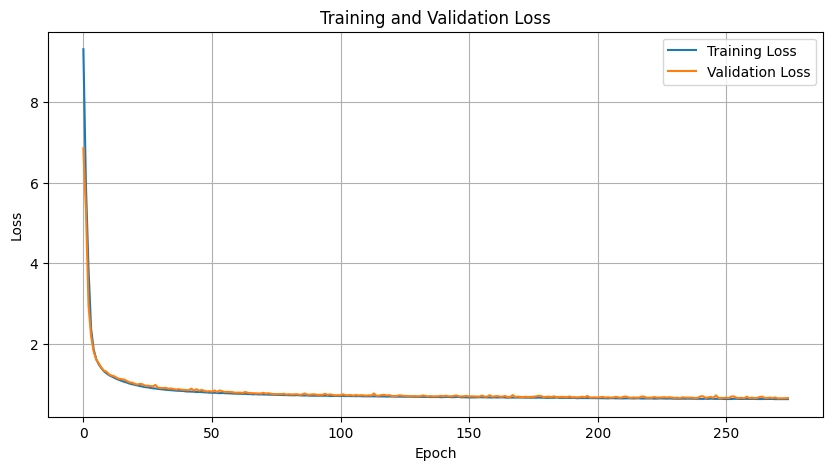

125/125 [==============================] - 0s 2ms/step - loss: 0.6143 - mae: 0.9995 - mse: 2.1989
Validation Loss: 0.6143
Validation MAE: 0.9995
Validation MSE: 2.1989
125/125 [==============================] - 0s 2ms/step - loss: 0.6143 - mae: 0.9995 - mse: 2.1989


1/1 [==============================] - 0s 155ms/step - loss: 1.4553 - mae: 1.9553 - mse: 4.4575
Best epoch: 258


In [ ]:
#model 3: relu with ADAM beta_1 and beta_2 parameters
dnn(models[0], opts[1])

Close still Overfitting,
Validation Loss: 0.5642
Validation MAE: 0.9480
Validation MSE: 1.7048
Best epoch: 217


Epoch 1: val_loss improved from inf to 6.10207, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 6.10207 to 3.13674, saving model to best_model.h5

Epoch 3: val_loss improved from 3.13674 to 2.32204, saving model to best_model.h5

Epoch 4: val_loss improved from 2.32204 to 1.89744, saving model to best_model.h5

Epoch 5: val_loss improved from 1.89744 to 1.62120, saving model to best_model.h5

Epoch 6: val_loss improved from 1.62120 to 1.47905, saving model to best_model.h5

Epoch 7: val_loss improved from 1.47905 to 1.39085, saving model to best_model.h5

Epoch 8: val_loss improved from 1.39085 to 1.30158, saving model to best_model.h5

Epoch 9: val_loss improved from 1.30158 to 1.24603, saving model to best_model.h5

Epoch 10: val_loss improved from 1.24603 to 1.21158, saving model to best_model.h5

Epoch 11: val_loss improved from 1.21158 to 1.15549, saving model to best_model.h5

Epoch 12: val_loss improved from 1.15549 to 1.12871, saving model to best_model.h5

Epoch 13: val_loss improved from 1.12871 to 1.11553, saving model to best_model.h5


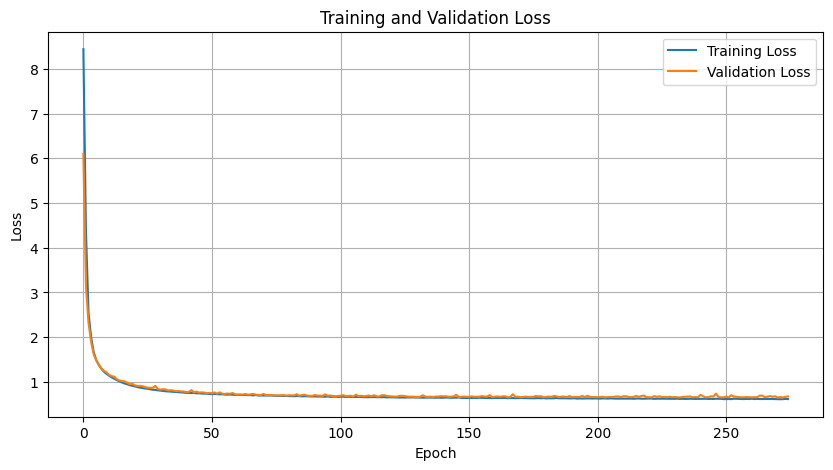

125/125 [==============================] - 1s 3ms/step - loss: 0.6266 - mae: 1.0150 - mse: 2.2912
Validation Loss: 0.6266
Validation MAE: 1.0150
Validation MSE: 2.2912
1/1 [==============================] - 0s 229ms/step - loss: 1.2159 - mae: 1.7134 - mse: 3.5521
Best epoch: 271


In [21]:
#model 4: relu with ADAM beta_1 and beta_2 parameters- with normalisation
dnn(models[0], opts[1], norm_layer)

Close,
Validation Loss: 0.6266,
Validation MAE: 1.0150,
Validation MSE: 2.2912,
Best epoch: 271


Epoch 1: val_loss improved from inf to 2.57745, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.57745 to 1.81190, saving model to best_model.h5

Epoch 3: val_loss improved from 1.81190 to 1.48046, saving model to best_model.h5

Epoch 4: val_loss improved from 1.48046 to 1.15801, saving model to best_model.h5

Epoch 5: val_loss did not improve from 1.15801

Epoch 6: val_loss improved from 1.15801 to 0.92191, saving model to best_model.h5

Epoch 7: val_loss did not improve from 0.92191

Epoch 8: val_loss improved from 0.92191 to 0.87326, saving model to best_model.h5

Epoch 9: val_loss improved from 0.87326 to 0.81764, saving model to best_model.h5

Epoch 10: val_loss did not improve from 0.81764

Epoch 11: val_loss did not improve from 0.81764

Epoch 12: val_loss did not improve from 0.81764

Epoch 13: val_loss did not improve from 0.81764

Epoch 14: val_loss improved from 0.81764 to 0.79883, saving model to best_model.h5

Epoch 15: val_loss improved from 0.79883 to 0.79238, saving model to best_model.h5

Epoch 16: val_loss improved from 0.79238 

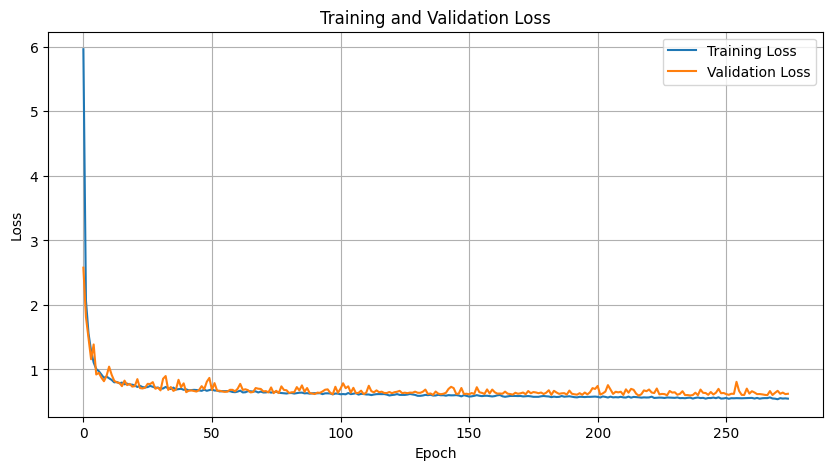

125/125 [==============================] - 1s 3ms/step - loss: 0.5791 - mae: 0.9637 - mse: 1.9608
Validation Loss: 0.5791
Validation MAE: 0.9637
Validation MSE: 1.9608
1/1 [==============================] - 0s 160ms/step - loss: 1.1528 - mae: 1.6161 - mse: 3.2097
Best epoch: 217


In [ ]:
#model 5: relu, SGD with momentum
dnn(models[0], opts[2])

Close still overfitting,
Validation Loss: 0.5791,
Validation MAE: 0.9637,
Validation MSE: 1.9608,
Best epoch: 217


Epoch 1: val_loss improved from inf to 2.46913, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.46913 to 1.68358, saving model to best_model.h5

Epoch 3: val_loss improved from 1.68358 to 1.56074, saving model to best_model.h5

Epoch 4: val_loss improved from 1.56074 to 1.23852, saving model to best_model.h5

Epoch 5: val_loss improved from 1.23852 to 1.23271, saving model to best_model.h5

Epoch 6: val_loss improved from 1.23271 to 0.92536, saving model to best_model.h5

Epoch 7: val_loss did not improve from 0.92536

Epoch 8: val_loss improved from 0.92536 to 0.86003, saving model to best_model.h5

Epoch 9: val_loss improved from 0.86003 to 0.80854, saving model to best_model.h5

Epoch 10: val_loss did not improve from 0.80854

Epoch 11: val_loss did not improve from 0.80854

Epoch 12: val_loss did not improve from 0.80854

Epoch 13: val_loss did not improve from 0.80854

Epoch 14: val_loss improved from 0.80854 to 0.77647, saving model to best_model.h5

Epoch 15: val_loss did not improve from 0.77647

Epoch 16: val_loss improved from 0.77647 

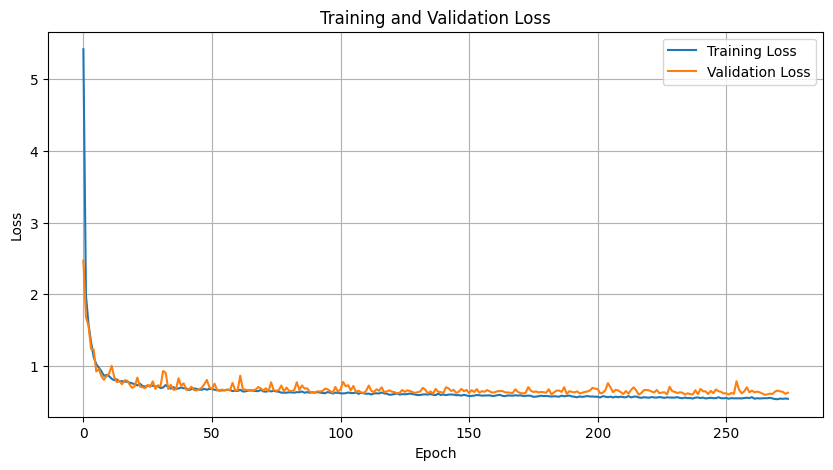

125/125 [==============================] - 0s 2ms/step - loss: 0.5777 - mae: 0.9627 - mse: 1.8810
Validation Loss: 0.5777
Validation MAE: 0.9627
Validation MSE: 1.8810
125/125 [==============================] - 0s 1ms/step - loss: 0.5777 - mae: 0.9627 - mse: 1.8810


1/1 [==============================] - 0s 163ms/step - loss: 1.1550 - mae: 1.6358 - mse: 3.1519
Best epoch: 266


In [ ]:
#model 6: relu with SGD- with normalization
dnn(models[0], opts[2], norm_layer)


Overfitting,
Validation Loss: 0.5642
Validation MAE: 0.9480
Validation MSE: 1.7048
Best epoch: 217


Epoch 1: val_loss improved from inf to 2.46393, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.46393 to 1.52010, saving model to best_model.h5

Epoch 3: val_loss improved from 1.52010 to 1.14806, saving model to best_model.h5

Epoch 4: val_loss improved from 1.14806 to 1.12852, saving model to best_model.h5

Epoch 5: val_loss improved from 1.12852 to 0.94167, saving model to best_model.h5

Epoch 6: val_loss improved from 0.94167 to 0.92003, saving model to best_model.h5

Epoch 7: val_loss did not improve from 0.92003

Epoch 8: val_loss did not improve from 0.92003

Epoch 9: val_loss improved from 0.92003 to 0.88443, saving model to best_model.h5

Epoch 10: val_loss improved from 0.88443 to 0.79595, saving model to best_model.h5

Epoch 11: val_loss did not improve from 0.79595

Epoch 12: val_loss did not improve from 0.79595

Epoch 13: val_loss improved from 0.79595 to 0.74446, saving model to best_model.h5

Epoch 14: val_loss improved from 0.74446 to 0.74122, saving model to best_model.h5

Epoch 15: val_loss did not improve from 0.74122

Epoch 

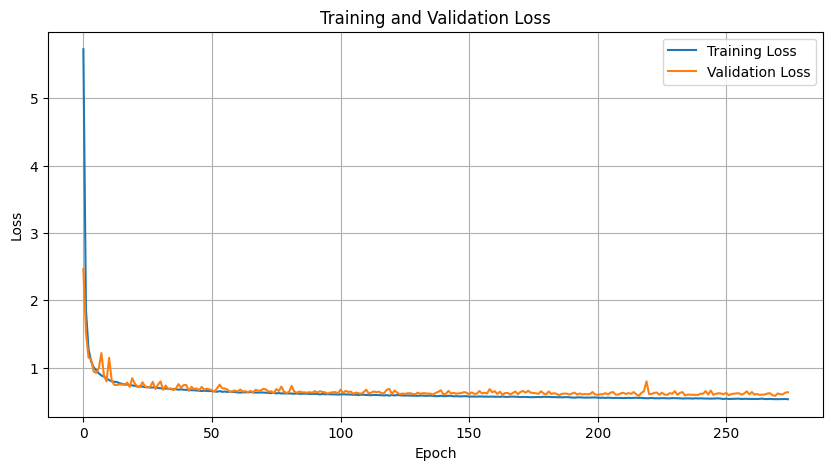

125/125 [==============================] - 0s 2ms/step - loss: 0.5733 - mae: 0.9563 - mse: 1.8299
Validation Loss: 0.5733
Validation MAE: 0.9563
Validation MSE: 1.8299
1/1 [==============================] - 0s 155ms/step - loss: 1.0884 - mae: 1.4868 - mse: 3.1535
Best epoch: 270


In [ ]:
#model 7: SGD with nesterov momentum
dnn(models[0], opts[3])

Close still overfitting,
Validation Loss: 0.5733,
Validation MAE: 0.9563,
Validation MSE: 1.8299,
Best epoch: 270


Epoch 1: val_loss improved from inf to 2.77833, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.77833 to 1.77147, saving model to best_model.h5

Epoch 3: val_loss improved from 1.77147 to 1.29126, saving model to best_model.h5

Epoch 4: val_loss improved from 1.29126 to 1.17512, saving model to best_model.h5

Epoch 5: val_loss improved from 1.17512 to 0.93809, saving model to best_model.h5

Epoch 6: val_loss did not improve from 0.93809

Epoch 7: val_loss did not improve from 0.93809

Epoch 8: val_loss did not improve from 0.93809

Epoch 9: val_loss improved from 0.93809 to 0.91721, saving model to best_model.h5

Epoch 10: val_loss improved from 0.91721 to 0.78723, saving model to best_model.h5

Epoch 11: val_loss did not improve from 0.78723

Epoch 12: val_loss did not improve from 0.78723

Epoch 13: val_loss improved from 0.78723 to 0.74224, saving model to best_model.h5

Epoch 14: val_loss did not improve from 0.74224

Epoch 15: val_loss improved from 0.74224 to 0.73309, saving model to best_model.h5

Epoch 16: val_loss did not improve from 0

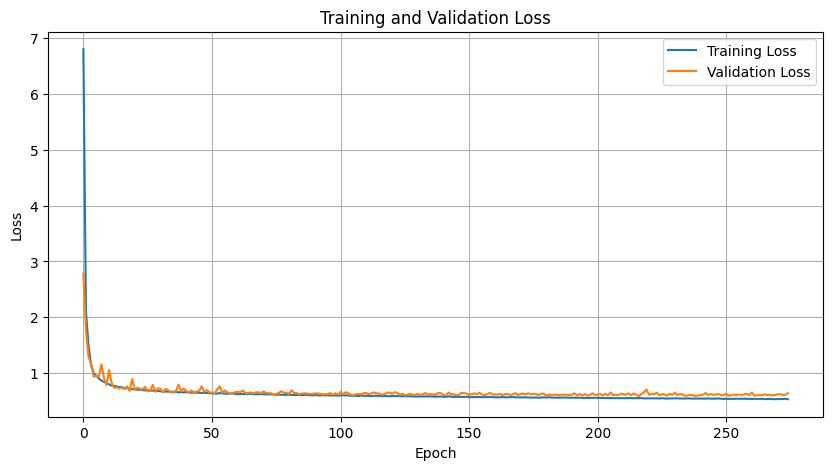

125/125 [==============================] - 0s 1ms/step - loss: 0.5734 - mae: 0.9568 - mse: 1.9198
Validation Loss: 0.5734
Validation MAE: 0.9568
Validation MSE: 1.9198
1/1 [==============================] - 0s 363ms/step - loss: 1.1862 - mae: 1.6630 - mse: 3.3199
Best epoch: 217


In [ ]:
#model 8: SGD with nesterov momentum- with normalization
dnn(models[0], opts[3], norm_layer)

Close still overfitting,
Validation Loss: 0.5734,
Validation MAE: 0.9568,
Validation MSE: 1.9198,
Best epoch: 217


Epoch 1: val_loss improved from inf to 1.92340, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.92340 to 1.28328, saving model to best_model.h5

Epoch 3: val_loss improved from 1.28328 to 1.23238, saving model to best_model.h5

Epoch 4: val_loss improved from 1.23238 to 1.02491, saving model to best_model.h5

Epoch 5: val_loss improved from 1.02491 to 0.97889, saving model to best_model.h5

Epoch 6: val_loss improved from 0.97889 to 0.95193, saving model to best_model.h5

Epoch 7: val_loss improved from 0.95193 to 0.84612, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.84612

Epoch 9: val_loss did not improve from 0.84612

Epoch 10: val_loss did not improve from 0.84612

Epoch 11: val_loss improved from 0.84612 to 0.77370, saving model to best_model.h5

Epoch 12: val_loss did not improve from 0.77370

Epoch 13: val_loss did not improve from 0.77370

Epoch 14: val_loss did not improve from 0.77370

Epoch 15: val_loss improved from 0.77370 to 0.73766, saving model to best_model.h5

Epoch 16: val_loss did not improve from 0

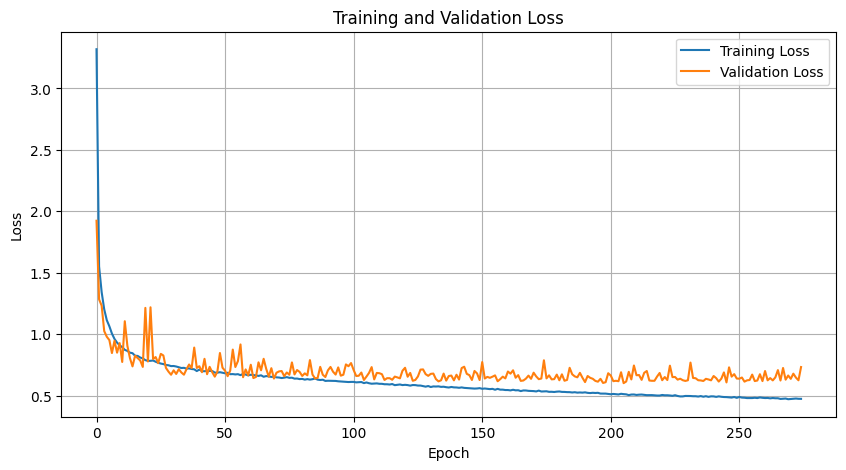

125/125 [==============================] - 1s 3ms/step - loss: 0.5952 - mae: 0.9823 - mse: 1.7412 - accuracy: 0.0000e+00
Validation Loss: 0.5952
Validation MAE: 0.9823
Validation MSE: 1.7412
125/125 [==============================] - 0s 3ms/step - loss: 0.5952 - mae: 0.9823 - mse: 1.7412 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 175ms/step - loss: 1.2571 - mae: 1.7395 - mse: 3.6045 - accuracy: 0.0000e+00
Best epoch: 206


In [ ]:
#model 9: RMSprop
dnn(models[0], opts[4])

Overfitting,
Validation Loss: 0.5952
Validation MAE: 0.9823
Validation MSE: 1.7412


Epoch 1: val_loss improved from inf to 1.71357, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.71357 to 1.25790, saving model to best_model.h5

Epoch 3: val_loss did not improve from 1.25790

Epoch 4: val_loss improved from 1.25790 to 1.23972, saving model to best_model.h5

Epoch 5: val_loss improved from 1.23972 to 0.97139, saving model to best_model.h5

Epoch 6: val_loss improved from 0.97139 to 0.93720, saving model to best_model.h5

Epoch 7: val_loss improved from 0.93720 to 0.83538, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.83538

Epoch 9: val_loss did not improve from 0.83538

Epoch 10: val_loss improved from 0.83538 to 0.81247, saving model to best_model.h5

Epoch 11: val_loss improved from 0.81247 to 0.78393, saving model to best_model.h5

Epoch 12: val_loss did not improve from 0.78393

Epoch 13: val_loss did not improve from 0.78393

Epoch 14: val_loss did not improve from 0.78393

Epoch 15: val_loss improved from 0.78393 to 0.72942, saving model to best_model.h5

Epoch 16: val_loss did not improve from 0

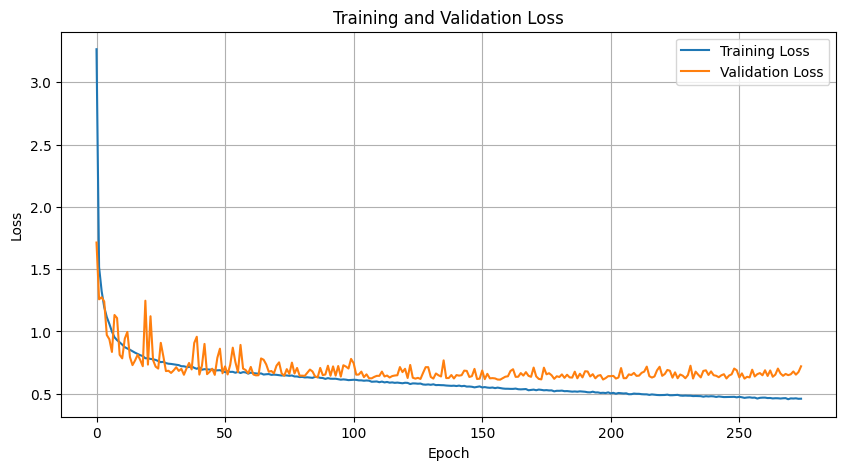

125/125 [==============================] - 0s 2ms/step - loss: 0.5962 - mae: 0.9822 - mse: 1.8146
Validation Loss: 0.5962
Validation MAE: 0.9822
Validation MSE: 1.8146
1/1 [==============================] - 0s 171ms/step - loss: 0.8696 - mae: 1.3635 - mse: 2.2909
Best epoch: 158


In [ ]:
#model 10: RMSprop
dnn(models[0], opts[4], norm_layer)

Overfitting,
Validation Loss: 0.5962,
Validation MAE: 0.9822,
Validation MSE: 1.8146,
Best epoch: 158


Epoch 1: val_loss improved from inf to 1.59579, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.59579 to 1.29161, saving model to best_model.h5

Epoch 3: val_loss improved from 1.29161 to 1.22098, saving model to best_model.h5

Epoch 4: val_loss did not improve from 1.22098

Epoch 5: val_loss improved from 1.22098 to 0.97617, saving model to best_model.h5

Epoch 6: val_loss improved from 0.97617 to 0.95997, saving model to best_model.h5

Epoch 7: val_loss improved from 0.95997 to 0.86352, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.86352

Epoch 9: val_loss did not improve from 0.86352

Epoch 10: val_loss improved from 0.86352 to 0.78620, saving model to best_model.h5

Epoch 11: val_loss did not improve from 0.78620

Epoch 12: val_loss did not improve from 0.78620

Epoch 13: val_loss did not improve from 0.78620

Epoch 14: val_loss improved from 0.78620 to 0.77270, saving model to best_model.h5

Epoch 15: val_loss improved from 0.77270 to 0.73324, saving model to best_model.h5

Epoch 16: val_loss did not improve from 0

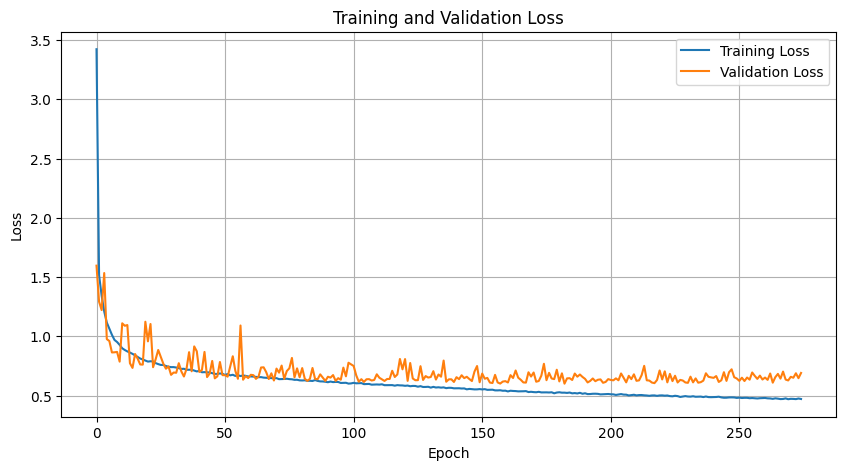

125/125 [==============================] - 0s 2ms/step - loss: 0.5950 - mae: 0.9791 - mse: 1.8489
Validation Loss: 0.5950
Validation MAE: 0.9791
Validation MSE: 1.8489
1/1 [==============================] - 0s 195ms/step - loss: 0.8193 - mae: 1.2566 - mse: 2.4983
Best epoch: 183


In [ ]:
#model 11: RMSprop with rho
dnn(models[0], opts[5])

More Overfitting,
Validation Loss: 0.5950,
Validation MAE: 0.9791,
Validation MSE: 1.8489,
Best epoch: 183


Epoch 1: val_loss improved from inf to 1.63782, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.63782 to 1.28528, saving model to best_model.h5

Epoch 3: val_loss improved from 1.28528 to 1.21769, saving model to best_model.h5

Epoch 4: val_loss did not improve from 1.21769

Epoch 5: val_loss improved from 1.21769 to 0.97026, saving model to best_model.h5

Epoch 6: val_loss did not improve from 0.97026

Epoch 7: val_loss improved from 0.97026 to 0.85222, saving model to best_model.h5

Epoch 8: val_loss improved from 0.85222 to 0.82663, saving model to best_model.h5

Epoch 9: val_loss did not improve from 0.82663

Epoch 10: val_loss did not improve from 0.82663

Epoch 11: val_loss did not improve from 0.82663

Epoch 12: val_loss did not improve from 0.82663

Epoch 13: val_loss did not improve from 0.82663

Epoch 14: val_loss improved from 0.82663 to 0.79940, saving model to best_model.h5

Epoch 15: val_loss improved from 0.79940 to 0.73259, saving model to best_model.h5

Epoch 16: val_loss did not improve from 0.73259

Epoch 17: val_loss did not 

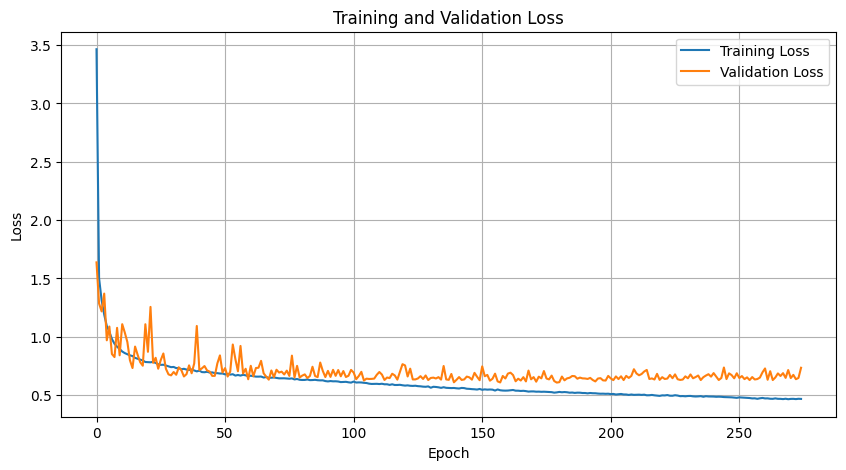

125/125 [==============================] - 0s 2ms/step - loss: 0.6060 - mae: 0.9956 - mse: 1.9179
Validation Loss: 0.6060
Validation MAE: 0.9956
Validation MSE: 1.9179
1/1 [==============================] - 0s 168ms/step - loss: 1.5227 - mae: 2.0227 - mse: 4.4466
Best epoch: 180


In [22]:
#model 12: RMSprop with rho
dnn(models[0], opts[5], norm_layer)

More Overfitting,
Validation Loss: 0.6060,
Validation MAE: 0.9956,
Validation MSE: 1.9179,
Best epoch: 180


Epoch 1: val_loss improved from inf to 1.61369, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.61369 to 1.12774, saving model to best_model.h5

Epoch 3: val_loss improved from 1.12774 to 0.96820, saving model to best_model.h5

Epoch 4: val_loss did not improve from 0.96820

Epoch 5: val_loss did not improve from 0.96820

Epoch 6: val_loss improved from 0.96820 to 0.86206, saving model to best_model.h5

Epoch 7: val_loss improved from 0.86206 to 0.82516, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.82516

Epoch 9: val_loss improved from 0.82516 to 0.78681, saving model to best_model.h5

Epoch 10: val_loss did not improve from 0.78681

Epoch 11: val_loss improved from 0.78681 to 0.77075, saving model to best_model.h5

Epoch 12: val_loss did not improve from 0.77075

Epoch 13: val_loss improved from 0.77075 to 0.74252, saving model to best_model.h5

Epoch 14: val_loss did not improve from 0.74252

Epoch 15: val_loss improved from 0.74252 to 0.72752, saving model to best_model.h5

Epoch 16: val_loss did not improve from 0

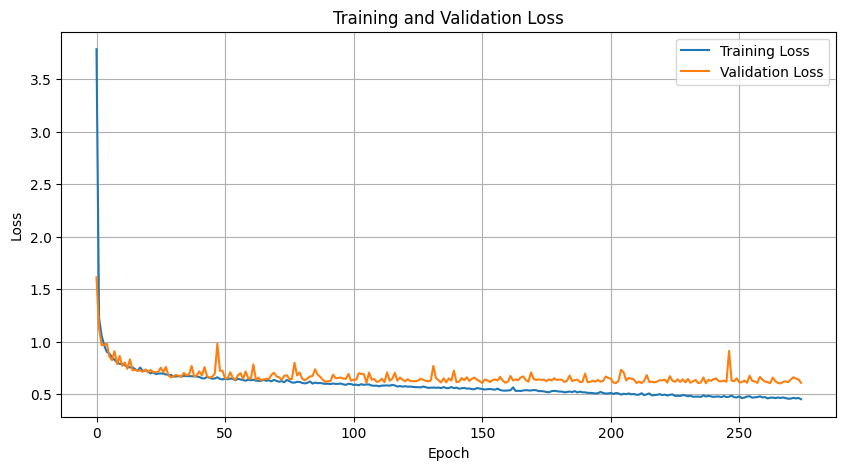

125/125 [==============================] - 0s 2ms/step - loss: 0.5870 - mae: 0.9740 - mse: 1.7790
Validation Loss: 0.5870
Validation MAE: 0.9740
Validation MSE: 1.7790
1/1 [==============================] - 0s 182ms/step - loss: 0.9444 - mae: 1.3169 - mse: 2.8713
Best epoch: 267


In [23]:
#model 13: 4 dense layers with Adam
dnn(models[1], opts[0])

Overfitting,
Validation Loss: 0.5870,
Validation MAE: 0.9740,
Validation MSE: 1.7790,
Best epoch: 267


Epoch 1: val_loss improved from inf to 1.52518, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.52518 to 1.34594, saving model to best_model.h5

Epoch 3: val_loss improved from 1.34594 to 1.01392, saving model to best_model.h5

Epoch 4: val_loss improved from 1.01392 to 1.00136, saving model to best_model.h5

Epoch 5: val_loss improved from 1.00136 to 0.93841, saving model to best_model.h5

Epoch 6: val_loss improved from 0.93841 to 0.83306, saving model to best_model.h5

Epoch 7: val_loss improved from 0.83306 to 0.82124, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.82124

Epoch 9: val_loss improved from 0.82124 to 0.77886, saving model to best_model.h5

Epoch 10: val_loss did not improve from 0.77886

Epoch 11: val_loss did not improve from 0.77886

Epoch 12: val_loss did not improve from 0.77886

Epoch 13: val_loss improved from 0.77886 to 0.72728, saving model to best_model.h5

Epoch 14: val_loss did not improve from 0.72728

Epoch 15: val_loss did not improve from 0.72728

Epoch 16: val_loss improved from 0.72728 

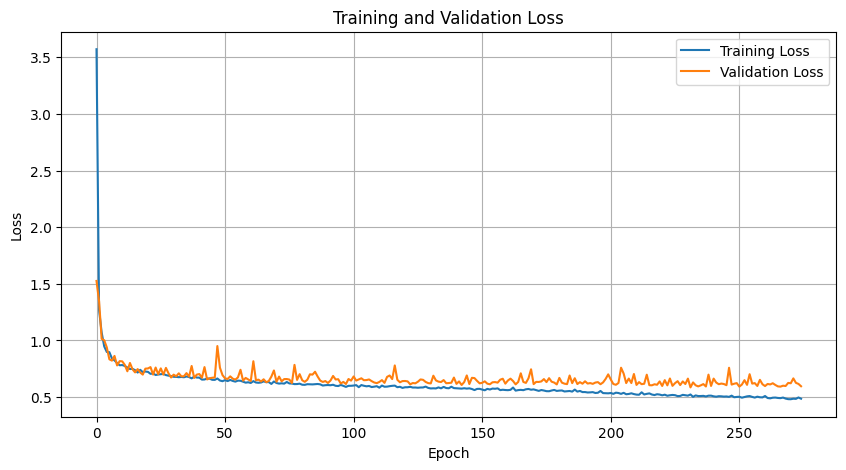

125/125 [==============================] - 1s 2ms/step - loss: 0.5725 - mae: 0.9566 - mse: 1.6985
Validation Loss: 0.5725
Validation MAE: 0.9566
Validation MSE: 1.6985
125/125 [==============================] - 0s 2ms/step - loss: 0.5725 - mae: 0.9566 - mse: 1.6985


1/1 [==============================] - 0s 174ms/step - loss: 1.0267 - mae: 1.4815 - mse: 2.9280
Best epoch: 232


In [58]:
#model 14: 5 dense layers with relu activation fn, he initialiser- Adam optimizer
dnn(models[2], opts[0])

Overfitting,
Validation Loss: 0.5725,
Validation MAE: 0.9566,
Validation MSE: 1.6985,
Best epoch: 232



Epoch 1: val_loss improved from inf to 7.73349, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 7.73349 to 5.76117, saving model to best_model.h5

Epoch 3: val_loss improved from 5.76117 to 3.60653, saving model to best_model.h5

Epoch 4: val_loss improved from 3.60653 to 2.54211, saving model to best_model.h5

Epoch 5: val_loss improved from 2.54211 to 2.11891, saving model to best_model.h5

Epoch 6: val_loss improved from 2.11891 to 1.87787, saving model to best_model.h5

Epoch 7: val_loss improved from 1.87787 to 1.73192, saving model to best_model.h5

Epoch 8: val_loss improved from 1.73192 to 1.63183, saving model to best_model.h5

Epoch 9: val_loss improved from 1.63183 to 1.53136, saving model to best_model.h5

Epoch 10: val_loss improved from 1.53136 to 1.48527, saving model to best_model.h5

Epoch 11: val_loss improved from 1.48527 to 1.40412, saving model to best_model.h5

Epoch 12: val_loss improved from 1.40412 to 1.35614, saving model to best_model.h5

Epoch 13: val_loss improved from 1.35614 to 1.31801, saving model to best_model.h5


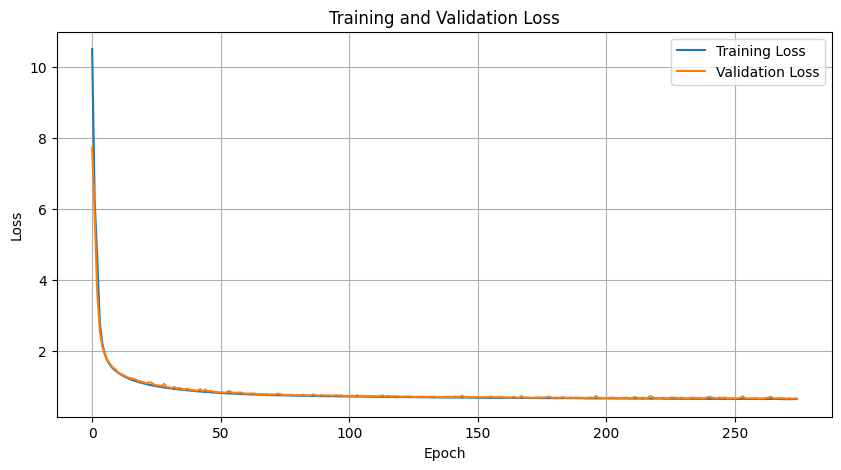

125/125 [==============================] - 0s 2ms/step - loss: 0.6348 - mae: 1.0227 - mse: 2.3197
Validation Loss: 0.6348
Validation MAE: 1.0227
Validation MSE: 2.3197
125/125 [==============================] - 0s 3ms/step - loss: 0.6348 - mae: 1.0227 - mse: 2.3197


1/1 [==============================] - 0s 271ms/step - loss: 1.0335 - mae: 1.5145 - mse: 2.9280
Best epoch: 271


In [60]:
#model 15: 5 dense layers with relu activation fn, he initialiser- Adam optimizer with beta1 and beta2
dnn(models[2], opts[1])

Close,
Validation Loss: 0.6348,
Validation MAE: 1.0227,
Validation MSE: 2.3197,
Best epoch: 271


In [ ]:
#model 16: 5 dense layers with relu activation fn, he initialiser- SGD optimizer momentum
dnn(models[2], opts[2])

Close,
Validation Loss: 0.5725,
Validation MAE: 0.9566,
Validation MSE: 1.6985,
Best epoch: 232



Epoch 1: val_loss improved from inf to 2.70855, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.70855 to 1.68975, saving model to best_model.h5

Epoch 3: val_loss improved from 1.68975 to 1.24448, saving model to best_model.h5

Epoch 4: val_loss improved from 1.24448 to 1.14095, saving model to best_model.h5

Epoch 5: val_loss improved from 1.14095 to 0.95256, saving model to best_model.h5

Epoch 6: val_loss improved from 0.95256 to 0.93185, saving model to best_model.h5

Epoch 7: val_loss improved from 0.93185 to 0.88952, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.88952

Epoch 9: val_loss did not improve from 0.88952

Epoch 10: val_loss improved from 0.88952 to 0.77067, saving model to best_model.h5

Epoch 11: val_loss did not improve from 0.77067

Epoch 12: val_loss did not improve from 0.77067

Epoch 13: val_loss improved from 0.77067 to 0.74697, saving model to best_model.h5

Epoch 14: val_loss improved from 0.74697 to 0.73961, saving model to best_model.h5

Epoch 15: val_loss improved from 0.73961 to 0.72794, sa

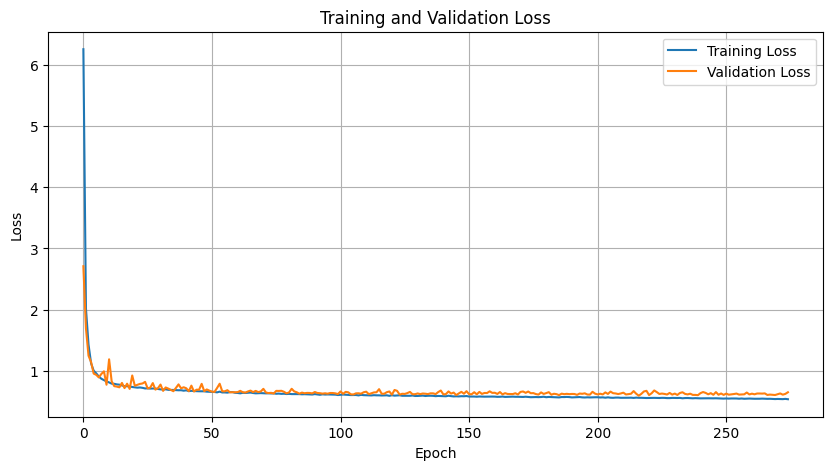

125/125 [==============================] - 1s 2ms/step - loss: 0.5730 - mae: 0.9564 - mse: 1.8128
Validation Loss: 0.5730
Validation MAE: 0.9564
Validation MSE: 1.8128
1/1 [==============================] - 0s 257ms/step - loss: 1.1324 - mae: 1.6164 - mse: 3.0544
Best epoch: 217


In [61]:
#model 17: 5 dense layers with relu activation fn, he initialiser- SGD with nesterov, momentum
dnn(models[2], opts[3])

Overfitting,
Validation Loss: 0.5730,
Validation MAE: 0.9564,
Validation MSE: 1.8128,
Best epoch: 217


Epoch 1: val_loss improved from inf to 1.89797, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.89797 to 1.27059, saving model to best_model.h5

Epoch 3: val_loss improved from 1.27059 to 1.19770, saving model to best_model.h5

Epoch 4: val_loss did not improve from 1.19770

Epoch 5: val_loss improved from 1.19770 to 0.96721, saving model to best_model.h5

Epoch 6: val_loss improved from 0.96721 to 0.89746, saving model to best_model.h5

Epoch 7: val_loss improved from 0.89746 to 0.82395, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.82395

Epoch 9: val_loss improved from 0.82395 to 0.79808, saving model to best_model.h5

Epoch 10: val_loss did not improve from 0.79808

Epoch 11: val_loss improved from 0.79808 to 0.78603, saving model to best_model.h5

Epoch 12: val_loss did not improve from 0.78603

Epoch 13: val_loss did not improve from 0.78603

Epoch 14: val_loss improved from 0.78603 to 0.76329, saving model to best_model.h5

Epoch 15: val_loss improved from 0.76329 to 0.71909, saving model to best_model.h5

Epoch 

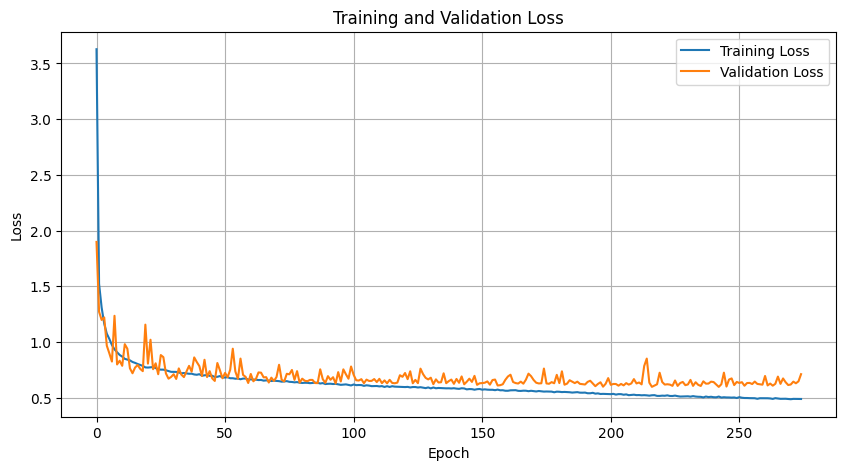

125/125 [==============================] - 1s 2ms/step - loss: 0.5756 - mae: 0.9629 - mse: 1.6875
Validation Loss: 0.5756
Validation MAE: 0.9629
Validation MSE: 1.6875
1/1 [==============================] - 0s 296ms/step - loss: 1.3072 - mae: 1.7880 - mse: 3.9934
Best epoch: 243


In [62]:
#model 18: 5 dense layers with relu activation fn, he initialiser- RMSprop
dnn(models[2], opts[4])

Overfitting,
Validation Loss: 0.5756,
Validation MAE: 0.9629,
Validation MSE: 1.6875,
Best epoch: 243


Epoch 1: val_loss improved from inf to 1.56907, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.56907 to 1.15925, saving model to best_model.h5

Epoch 3: val_loss improved from 1.15925 to 1.00710, saving model to best_model.h5

Epoch 4: val_loss improved from 1.00710 to 0.99331, saving model to best_model.h5

Epoch 5: val_loss improved from 0.99331 to 0.93462, saving model to best_model.h5

Epoch 6: val_loss improved from 0.93462 to 0.86592, saving model to best_model.h5

Epoch 7: val_loss improved from 0.86592 to 0.81563, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.81563

Epoch 9: val_loss improved from 0.81563 to 0.75858, saving model to best_model.h5

Epoch 10: val_loss did not improve from 0.75858

Epoch 11: val_loss did not improve from 0.75858

Epoch 12: val_loss improved from 0.75858 to 0.73008, saving model to best_model.h5

Epoch 13: val_loss did not improve from 0.73008

Epoch 14: val_loss did not improve from 0.73008

Epoch 15: val_loss did not improve from 0.73008

Epoch 16: val_loss improved from 0.73008 

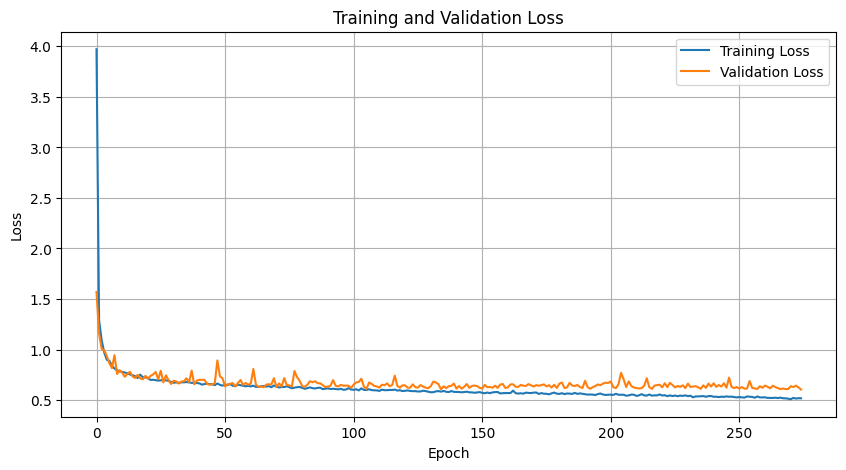

125/125 [==============================] - 1s 2ms/step - loss: 0.5896 - mae: 0.9769 - mse: 1.9681
Validation Loss: 0.5896
Validation MAE: 0.9769
Validation MSE: 1.9681
1/1 [==============================] - 0s 199ms/step - loss: 0.8845 - mae: 1.3039 - mse: 2.6260
Best epoch: 275


In [82]:
#model 19: using relu activation fn, leakyReLU, he initialiser- Adam
dnn(models[3], opts[0])

Overfitting,
Validation Loss: 0.5896,
Validation MAE: 0.9769,
Validation MSE: 1.9681,
Best epoch: 275


Epoch 1: val_loss improved from inf to 6.19666, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 6.19666 to 3.79748, saving model to best_model.h5

Epoch 3: val_loss improved from 3.79748 to 2.35894, saving model to best_model.h5

Epoch 4: val_loss improved from 2.35894 to 1.91098, saving model to best_model.h5

Epoch 5: val_loss improved from 1.91098 to 1.61730, saving model to best_model.h5

Epoch 6: val_loss improved from 1.61730 to 1.45120, saving model to best_model.h5

Epoch 7: val_loss improved from 1.45120 to 1.35297, saving model to best_model.h5

Epoch 8: val_loss improved from 1.35297 to 1.28199, saving model to best_model.h5

Epoch 9: val_loss improved from 1.28199 to 1.23675, saving model to best_model.h5

Epoch 10: val_loss improved from 1.23675 to 1.21300, saving model to best_model.h5

Epoch 11: val_loss improved from 1.21300 to 1.16035, saving model to best_model.h5

Epoch 12: val_loss improved from 1.16035 to 1.13690, saving model to best_model.h5

Epoch 13: val_loss improved from 1.13690 to 1.13149, saving model to best_model.h5


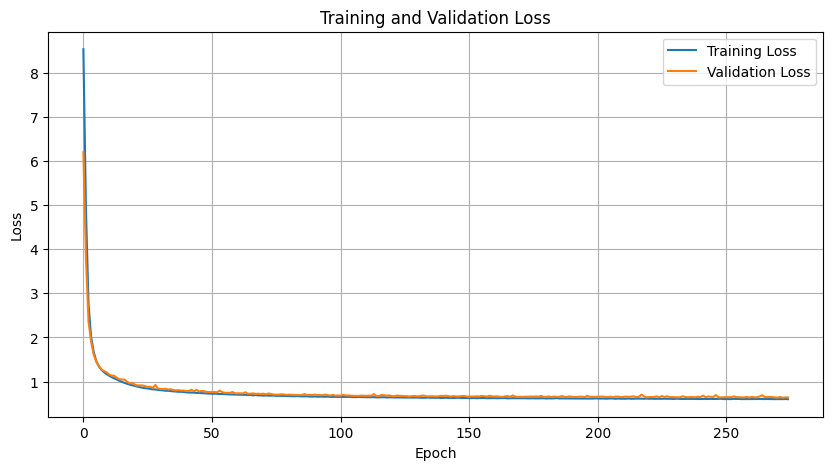

125/125 [==============================] - 0s 2ms/step - loss: 0.6089 - mae: 0.9958 - mse: 2.1851
Validation Loss: 0.6089
Validation MAE: 0.9958
Validation MSE: 2.1851
1/1 [==============================] - 0s 164ms/step - loss: 1.3101 - mae: 1.7922 - mse: 4.3466
Best epoch: 271


In [83]:
#model 20: using relu activation fn, leakyReLU, he initialiser- Adam with beta1 and beta2
dnn(models[3], opts[1])

Close,
Validation Loss: 0.5896
Validation MAE: 0.9769
Validation MSE: 1.9681
Best epoch: 275

Exception ignored in: <function _xla_gc_callback at 0x7824c84924d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 



Epoch 1: val_loss improved from inf to 6.44798, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 6.44798 to 4.38314, saving model to best_model.h5

Epoch 3: val_loss improved from 4.38314 to 2.56735, saving model to best_model.h5

Epoch 4: val_loss improved from 2.56735 to 2.04354, saving model to best_model.h5

Epoch 5: val_loss improved from 2.04354 to 1.68230, saving model to best_model.h5

Epoch 6: val_loss improved from 1.68230 to 1.46969, saving model to best_model.h5

Epoch 7: val_loss improved from 1.46969 to 1.36913, saving model to best_model.h5

Epoch 8: val_loss improved from 1.36913 to 1.29798, saving model to best_model.h5

Epoch 9: val_loss improved from 1.29798 to 1.24844, saving model to best_model.h5

Epoch 10: val_loss improved from 1.24844 to 1.23792, saving model to best_model.h5

Epoch 11: val_loss improved from 1.23792 to 1.17438, saving model to best_model.h5

Epoch 12: val_loss improved from 1.17438 to 1.14723, saving model to best_model.h5

Epoch 13: val_loss improved from 1.14723 to 1.11864, saving model to best_model.h5


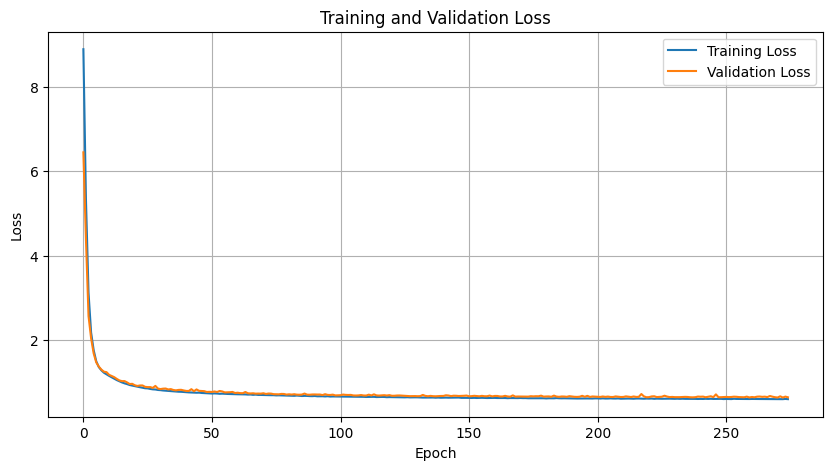

125/125 [==============================] - 1s 3ms/step - loss: 0.6187 - mae: 1.0065 - mse: 2.2126
Validation Loss: 0.6187
Validation MAE: 1.0065
Validation MSE: 2.2126
1/1 [==============================] - 0s 241ms/step - loss: 1.3783 - mae: 1.8783 - mse: 4.0613
Best epoch: 273


In [109]:
#model 21: using relu activation fn, leakyReLU, he initialiser- Adam with beta1 and beta2- with normalization
dnn(models[3], opts[1], norm_layer)

Close,
Validation Loss: 0.6187,
Validation MAE: 1.0065,
Validation MSE: 2.2126,
Best epoch: 273


Epoch 1: val_loss improved from inf to 2.56170, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.56170 to 1.69858, saving model to best_model.h5

Epoch 3: val_loss improved from 1.69858 to 1.37177, saving model to best_model.h5

Epoch 4: val_loss improved from 1.37177 to 1.15233, saving model to best_model.h5

Epoch 5: val_loss improved from 1.15233 to 0.97418, saving model to best_model.h5

Epoch 6: val_loss did not improve from 0.97418

Epoch 7: val_loss improved from 0.97418 to 0.93966, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.93966

Epoch 9: val_loss improved from 0.93966 to 0.91948, saving model to best_model.h5

Epoch 10: val_loss improved from 0.91948 to 0.79579, saving model to best_model.h5

Epoch 11: val_loss did not improve from 0.79579

Epoch 12: val_loss did not improve from 0.79579

Epoch 13: val_loss improved from 0.79579 to 0.73294, saving model to best_model.h5

Epoch 14: val_loss improved from 0.73294 to 0.72412, saving model to best_model.h5

Epoch 15: val_loss improved from 0.72412 to 0.71511, sa

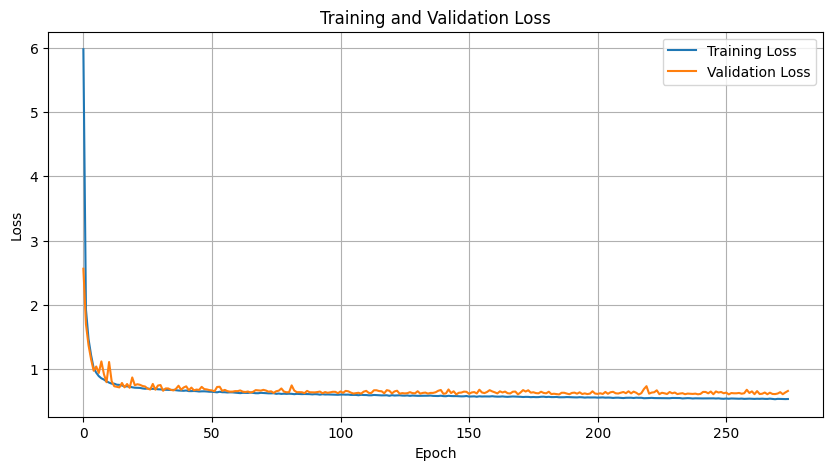

125/125 [==============================] - 1s 2ms/step - loss: 0.5918 - mae: 0.9791 - mse: 1.9638
Validation Loss: 0.5918
Validation MAE: 0.9791
Validation MSE: 1.9638
1/1 [==============================] - 0s 169ms/step - loss: 0.9961 - mae: 1.4764 - mse: 2.5379
Best epoch: 217


In [110]:
#model 22: using relu activation fn, leakyReLU, he initialiser- SGD with nesterov, momentum
dnn(models[3], opts[3])

Overfitting,
Validation Loss: 0.6187
Validation MAE: 1.0065
Validation MSE: 2.2126
Best epoch: 273


Epoch 1: val_loss improved from inf to 2.42487, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.42487 to 1.46708, saving model to best_model.h5

Epoch 3: val_loss improved from 1.46708 to 1.27904, saving model to best_model.h5

Epoch 4: val_loss improved from 1.27904 to 1.20957, saving model to best_model.h5

Epoch 5: val_loss improved from 1.20957 to 1.18124, saving model to best_model.h5

Epoch 6: val_loss improved from 1.18124 to 0.90355, saving model to best_model.h5

Epoch 7: val_loss improved from 0.90355 to 0.89767, saving model to best_model.h5

Epoch 8: val_loss improved from 0.89767 to 0.84336, saving model to best_model.h5

Epoch 9: val_loss improved from 0.84336 to 0.82815, saving model to best_model.h5

Epoch 10: val_loss did not improve from 0.82815

Epoch 11: val_loss did not improve from 0.82815

Epoch 12: val_loss did not improve from 0.82815

Epoch 13: val_loss improved from 0.82815 to 0.82610, saving model to best_model.h5

Epoch 14: val_loss did not improve from 0.82610

Epoch 15: val_loss improved from 0.82610 to 0.76646, sa

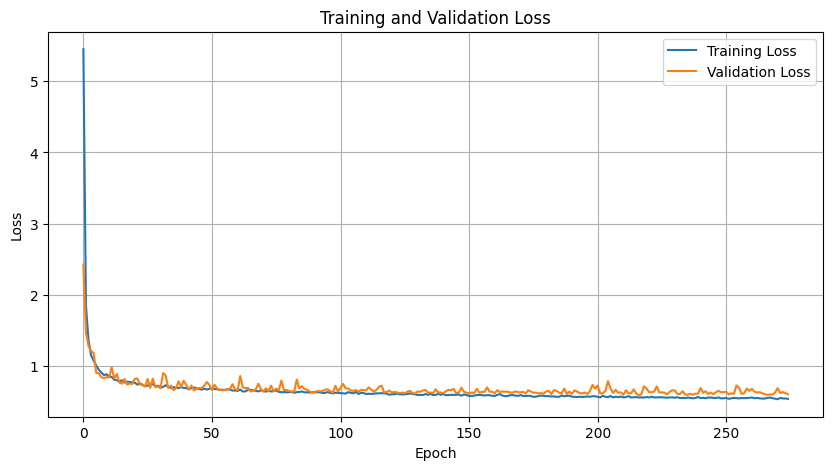

125/125 [==============================] - 0s 2ms/step - loss: 0.5713 - mae: 0.9549 - mse: 1.8660
Validation Loss: 0.5713
Validation MAE: 0.9549
Validation MSE: 1.8660
1/1 [==============================] - 0s 173ms/step - loss: 0.9842 - mae: 1.4371 - mse: 2.5841
Best epoch: 217


In [88]:
#model 23: using relu activation fn, leakyReLU, he initialiser- SGD with momentum
dnn(models[3], opts[2], norm_layer)

Close still overfitting,
Validation Loss: 0.5713,
Validation MAE: 0.9549,
Validation MSE: 1.8660,
Best epoch: 217


Epoch 1: val_loss improved from inf to 1.52854, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.52854 to 1.18940, saving model to best_model.h5

Epoch 3: val_loss improved from 1.18940 to 1.07097, saving model to best_model.h5

Epoch 4: val_loss improved from 1.07097 to 1.06516, saving model to best_model.h5

Epoch 5: val_loss improved from 1.06516 to 0.96849, saving model to best_model.h5

Epoch 6: val_loss improved from 0.96849 to 0.90639, saving model to best_model.h5

Epoch 7: val_loss improved from 0.90639 to 0.86832, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.86832

Epoch 9: val_loss improved from 0.86832 to 0.83166, saving model to best_model.h5

Epoch 10: val_loss did not improve from 0.83166

Epoch 11: val_loss improved from 0.83166 to 0.81121, saving model to best_model.h5

Epoch 12: val_loss improved from 0.81121 to 0.78413, saving model to best_model.h5

Epoch 13: val_loss did not improve from 0.78413

Epoch 14: val_loss did not improve from 0.78413

Epoch 15: val_loss improved from 0.78413 to 0.74925, sa

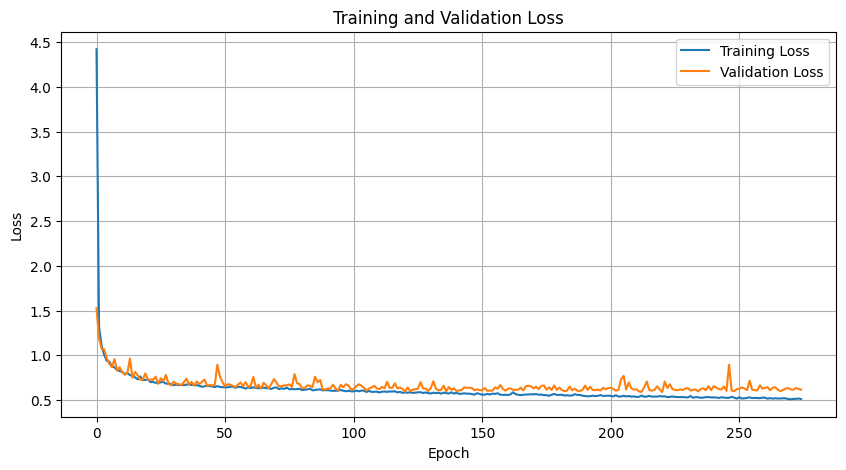

125/125 [==============================] - 0s 2ms/step - loss: 0.5810 - mae: 0.9645 - mse: 1.8646
Validation Loss: 0.5810
Validation MAE: 0.9645
Validation MSE: 1.8646
1/1 [==============================] - 0s 177ms/step - loss: 1.2115 - mae: 1.7115 - mse: 3.1915
Best epoch: 221


In [111]:
#model 24: using relu activation fn, dropout, he initialiser, L2 regularisation- Adam
dnn(models[4], opts[0])

Overfitting,
Validation Loss: 0.5810,
Validation MAE: 0.9645,
Validation MSE: 1.8646,
Best epoch: 221


Epoch 1: val_loss improved from inf to 6.46219, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 6.46219 to 4.76265, saving model to best_model.h5

Epoch 3: val_loss improved from 4.76265 to 2.82502, saving model to best_model.h5

Epoch 4: val_loss improved from 2.82502 to 2.08720, saving model to best_model.h5

Epoch 5: val_loss improved from 2.08720 to 1.72693, saving model to best_model.h5

Epoch 6: val_loss improved from 1.72693 to 1.55864, saving model to best_model.h5

Epoch 7: val_loss improved from 1.55864 to 1.47245, saving model to best_model.h5

Epoch 8: val_loss improved from 1.47245 to 1.39752, saving model to best_model.h5

Epoch 9: val_loss improved from 1.39752 to 1.34165, saving model to best_model.h5

Epoch 10: val_loss improved from 1.34165 to 1.31669, saving model to best_model.h5

Epoch 11: val_loss improved from 1.31669 to 1.26131, saving model to best_model.h5

Epoch 12: val_loss improved from 1.26131 to 1.23147, saving model to best_model.h5

Epoch 13: val_loss improved from 1.23147 to 1.21419, saving model to best_model.h5


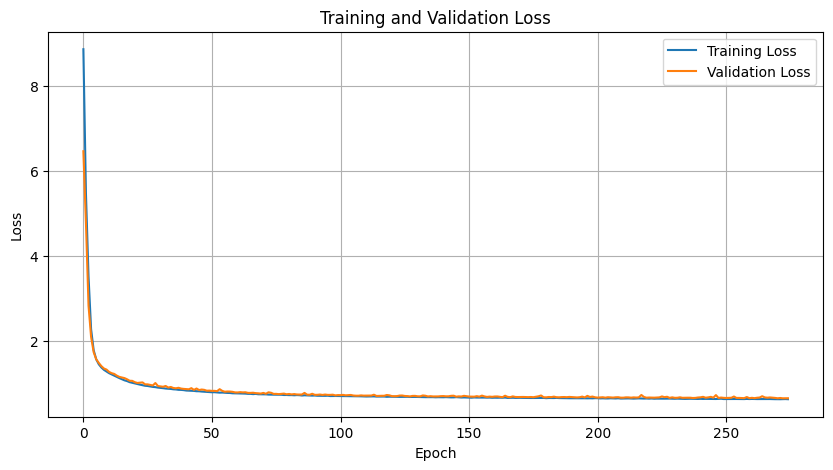

125/125 [==============================] - 1s 2ms/step - loss: 0.6253 - mae: 1.0140 - mse: 2.2336
Validation Loss: 0.6253
Validation MAE: 1.0140
Validation MSE: 2.2336
1/1 [==============================] - 0s 191ms/step - loss: 1.3519 - mae: 1.8519 - mse: 4.2172
Best epoch: 273


In [130]:
#model 25: using relu activation fn, dropout, he initialiser, L2 regularisation- Adam with beta1 and beta 2
dnn(models[4], opts[1])

Close,
Validation Loss: 0.6253,
Validation MAE: 1.0140,
Validation MSE: 2.2336,
Best epoch: 273


Epoch 1: val_loss improved from inf to 2.50272, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.50272 to 1.74904, saving model to best_model.h5

Epoch 3: val_loss improved from 1.74904 to 1.45230, saving model to best_model.h5

Epoch 4: val_loss improved from 1.45230 to 1.14056, saving model to best_model.h5

Epoch 5: val_loss improved from 1.14056 to 1.03720, saving model to best_model.h5

Epoch 6: val_loss improved from 1.03720 to 0.93033, saving model to best_model.h5

Epoch 7: val_loss improved from 0.93033 to 0.91866, saving model to best_model.h5

Epoch 8: val_loss improved from 0.91866 to 0.87223, saving model to best_model.h5

Epoch 9: val_loss improved from 0.87223 to 0.82611, saving model to best_model.h5

Epoch 10: val_loss did not improve from 0.82611

Epoch 11: val_loss did not improve from 0.82611

Epoch 12: val_loss did not improve from 0.82611

Epoch 13: val_loss improved from 0.82611 to 0.79523, saving model to best_model.h5

Epoch 14: val_loss improved from 0.79523 to 0.78636, saving model to best_model.h5

Epoch 15: val_loss d

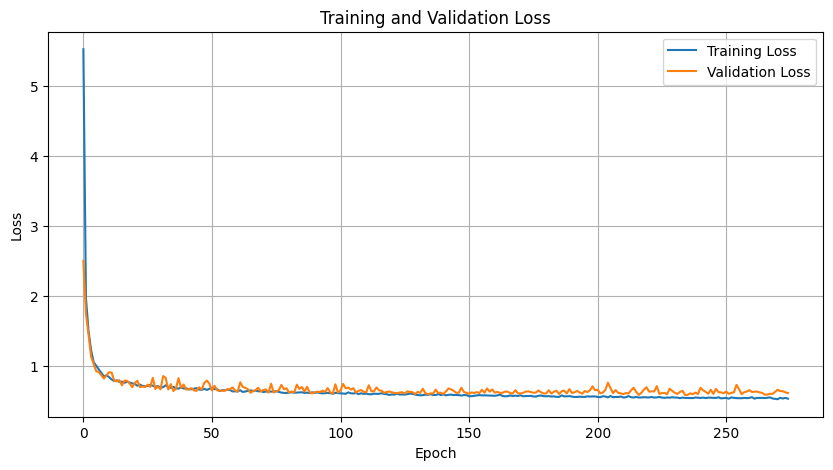

125/125 [==============================] - 1s 2ms/step - loss: 0.5715 - mae: 0.9543 - mse: 1.8914
Validation Loss: 0.5715
Validation MAE: 0.9543
Validation MSE: 1.8914
1/1 [==============================] - 0s 289ms/step - loss: 0.9853 - mae: 1.4776 - mse: 2.4254
Best epoch: 217


In [131]:
#model 26: using relu activation fn, dropout, he initialiser, L2 regularisation- SGD with momentum
dnn(models[4], opts[2])

Overfitting,
Validation Loss: 0.5715,
Validation MAE: 0.9543,
Validation MSE: 1.8914,
Best epoch: 217


Epoch 1: val_loss improved from inf to 2.72487, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.72487 to 1.73872, saving model to best_model.h5

Epoch 3: val_loss improved from 1.73872 to 1.31450, saving model to best_model.h5

Epoch 4: val_loss improved from 1.31450 to 1.16793, saving model to best_model.h5

Epoch 5: val_loss improved from 1.16793 to 0.96075, saving model to best_model.h5

Epoch 6: val_loss improved from 0.96075 to 0.95705, saving model to best_model.h5

Epoch 7: val_loss improved from 0.95705 to 0.89650, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.89650

Epoch 9: val_loss did not improve from 0.89650

Epoch 10: val_loss improved from 0.89650 to 0.81088, saving model to best_model.h5

Epoch 11: val_loss did not improve from 0.81088

Epoch 12: val_loss did not improve from 0.81088

Epoch 13: val_loss improved from 0.81088 to 0.74712, saving model to best_model.h5

Epoch 14: val_loss improved from 0.74712 to 0.74032, saving model to best_model.h5

Epoch 15: val_loss improved from 0.74032 to 0.72484, sa

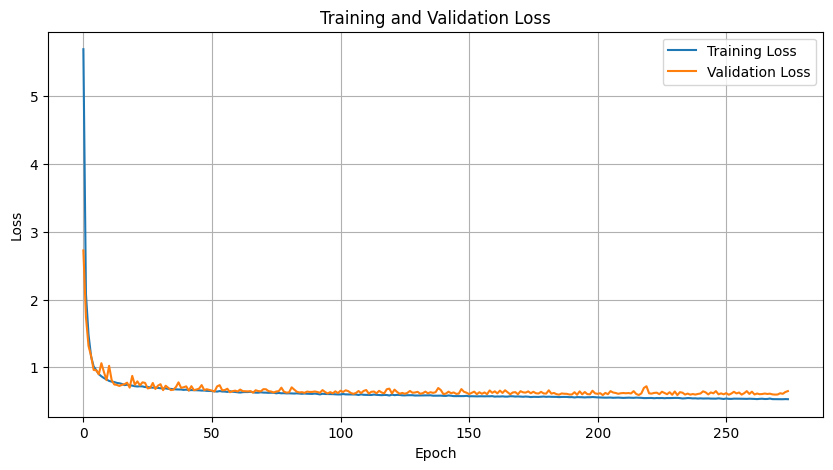

125/125 [==============================] - 0s 2ms/step - loss: 0.5663 - mae: 0.9501 - mse: 1.7673
Validation Loss: 0.5663
Validation MAE: 0.9501
Validation MSE: 1.7673
1/1 [==============================] - 0s 164ms/step - loss: 1.1541 - mae: 1.6541 - mse: 2.8296
Best epoch: 232


In [132]:
#model 27: using relu activation fn, dropout, he initialiser, L2 regularisation- SGD with momentum and Nestorev
dnn(models[4], opts[3], norm_layer)

Close still overfitting,
Validation Loss: 0.5663,
Validation MAE: 0.9501,
Validation MSE: 1.7673,
Best epoch: 232


Epoch 1: val_loss improved from inf to 1.62497, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.62497 to 1.32179, saving model to best_model.h5

Epoch 3: val_loss improved from 1.32179 to 1.02810, saving model to best_model.h5

Epoch 4: val_loss improved from 1.02810 to 1.01109, saving model to best_model.h5

Epoch 5: val_loss did not improve from 1.01109

Epoch 6: val_loss improved from 1.01109 to 0.88980, saving model to best_model.h5

Epoch 7: val_loss improved from 0.88980 to 0.86279, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.86279

Epoch 9: val_loss improved from 0.86279 to 0.80531, saving model to best_model.h5

Epoch 10: val_loss did not improve from 0.80531

Epoch 11: val_loss did not improve from 0.80531

Epoch 12: val_loss did not improve from 0.80531

Epoch 13: val_loss improved from 0.80531 to 0.75111, saving model to best_model.h5

Epoch 14: val_loss did not improve from 0.75111

Epoch 15: val_loss did not improve from 0.75111

Epoch 16: val_loss did not improve from 0.75111

Epoch 17: val_loss improved

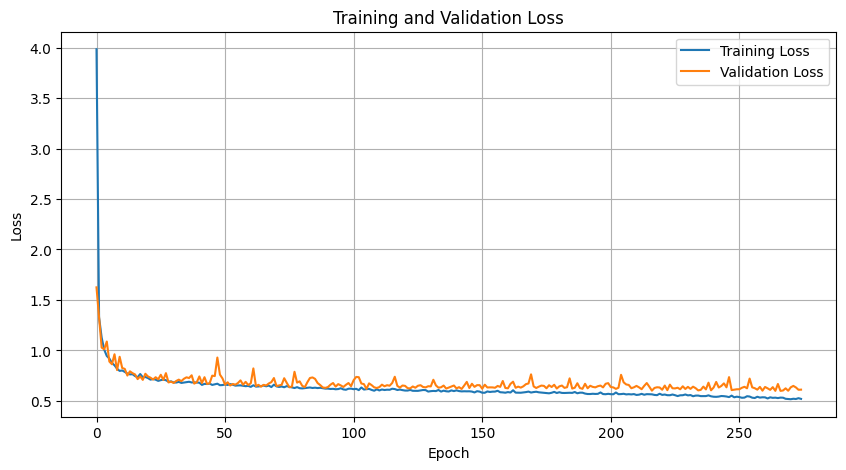

125/125 [==============================] - 1s 2ms/step - loss: 0.5683 - mae: 0.9522 - mse: 1.7929
Validation Loss: 0.5683
Validation MAE: 0.9522
Validation MSE: 1.7929
1/1 [==============================] - 0s 187ms/step - loss: 0.7652 - mae: 1.1746 - mse: 2.3432
Best epoch: 267


In [133]:
#model 28: using selu activation fn, LeCun initialiser- Adam optimizer
dnn(models[5], opts[0])

Overfitting,
Validation Loss: 0.5683,
Validation MAE: 0.9522,
Validation MSE: 1.7929,
Best epoch: 267


Epoch 1: val_loss improved from inf to 6.38662, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 6.38662 to 4.56302, saving model to best_model.h5

Epoch 3: val_loss improved from 4.56302 to 2.55350, saving model to best_model.h5

Epoch 4: val_loss improved from 2.55350 to 2.02763, saving model to best_model.h5

Epoch 5: val_loss improved from 2.02763 to 1.78654, saving model to best_model.h5

Epoch 6: val_loss improved from 1.78654 to 1.64379, saving model to best_model.h5

Epoch 7: val_loss improved from 1.64379 to 1.55629, saving model to best_model.h5

Epoch 8: val_loss improved from 1.55629 to 1.46732, saving model to best_model.h5

Epoch 9: val_loss improved from 1.46732 to 1.40362, saving model to best_model.h5

Epoch 10: val_loss improved from 1.40362 to 1.37604, saving model to best_model.h5

Epoch 11: val_loss improved from 1.37604 to 1.31710, saving model to best_model.h5

Epoch 12: val_loss improved from 1.31710 to 1.29372, saving model to best_model.h5

Epoch 13: val_loss improved from 1.29372 to 1.26861, saving model to best_model.h5


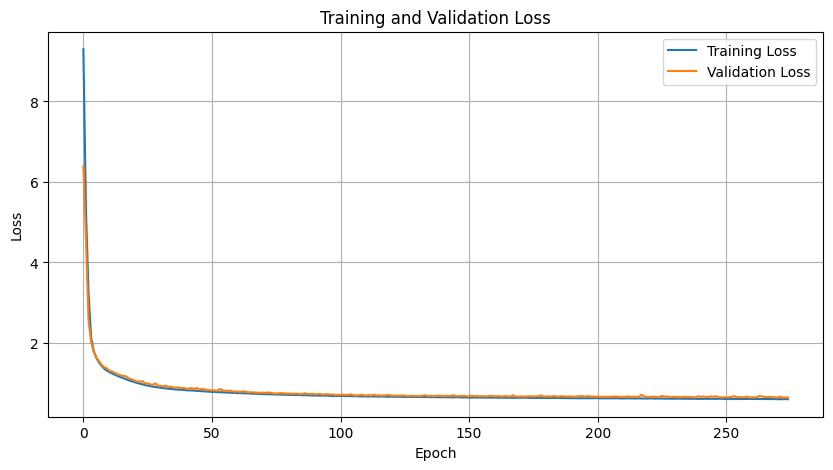

125/125 [==============================] - 1s 3ms/step - loss: 0.6106 - mae: 0.9928 - mse: 2.2061
Validation Loss: 0.6106
Validation MAE: 0.9928
Validation MSE: 2.2061
1/1 [==============================] - 0s 225ms/step - loss: 1.0142 - mae: 1.5142 - mse: 2.4400
Best epoch: 273


In [21]:
#model 29: using selu activation fn, LeCun initialiser- Adam with beta1 and beta2
dnn(models[5], opts[1])

Close,
Validation Loss: 0.6106,
Validation MAE: 0.9928,
Validation MSE: 2.2061,
Best epoch: 273


Epoch 1: val_loss improved from inf to 3.42520, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 3.42520 to 1.86144, saving model to best_model.h5

Epoch 3: val_loss improved from 1.86144 to 1.29376, saving model to best_model.h5

Epoch 4: val_loss improved from 1.29376 to 1.21141, saving model to best_model.h5

Epoch 5: val_loss did not improve from 1.21141

Epoch 6: val_loss improved from 1.21141 to 0.89043, saving model to best_model.h5

Epoch 7: val_loss did not improve from 0.89043

Epoch 8: val_loss improved from 0.89043 to 0.85045, saving model to best_model.h5

Epoch 9: val_loss improved from 0.85045 to 0.82253, saving model to best_model.h5

Epoch 10: val_loss improved from 0.82253 to 0.80899, saving model to best_model.h5

Epoch 11: val_loss did not improve from 0.80899

Epoch 12: val_loss did not improve from 0.80899

Epoch 13: val_loss improved from 0.80899 to 0.75200, saving model to best_model.h5

Epoch 14: val_loss did not improve from 0.75200

Epoch 15: val_loss did not improve from 0.75200

Epoch 16: val_loss improved from 0.75200 

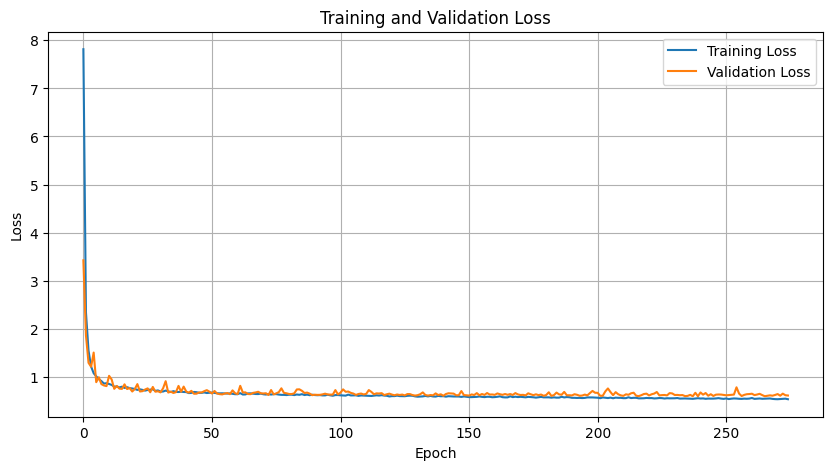

125/125 [==============================] - 1s 4ms/step - loss: 0.5814 - mae: 0.9666 - mse: 1.8834
Validation Loss: 0.5814
Validation MAE: 0.9666
Validation MSE: 1.8834
1/1 [==============================] - 0s 283ms/step - loss: 0.8589 - mae: 1.3589 - mse: 1.9303
Best epoch: 240


In [42]:
#model 30: using selu activation fn, LeCun initialiser- SGD with momentum
dnn(models[5], opts[2])

Close still overfitting,
Validation Loss: 0.5814,
Validation MAE: 0.9666,
Validation MSE: 1.8834,
Best epoch: 240


Epoch 1: val_loss improved from inf to 2.43892, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.43892 to 1.63137, saving model to best_model.h5

Epoch 3: val_loss improved from 1.63137 to 1.21936, saving model to best_model.h5

Epoch 4: val_loss improved from 1.21936 to 1.09098, saving model to best_model.h5

Epoch 5: val_loss improved from 1.09098 to 0.93006, saving model to best_model.h5

Epoch 6: val_loss improved from 0.93006 to 0.88015, saving model to best_model.h5

Epoch 7: val_loss did not improve from 0.88015

Epoch 8: val_loss did not improve from 0.88015

Epoch 9: val_loss did not improve from 0.88015

Epoch 10: val_loss improved from 0.88015 to 0.79589, saving model to best_model.h5

Epoch 11: val_loss did not improve from 0.79589

Epoch 12: val_loss did not improve from 0.79589

Epoch 13: val_loss improved from 0.79589 to 0.74710, saving model to best_model.h5

Epoch 14: val_loss improved from 0.74710 to 0.72924, saving model to best_model.h5

Epoch 15: val_loss did not improve from 0.72924

Epoch 16: val_loss did not improve from 0

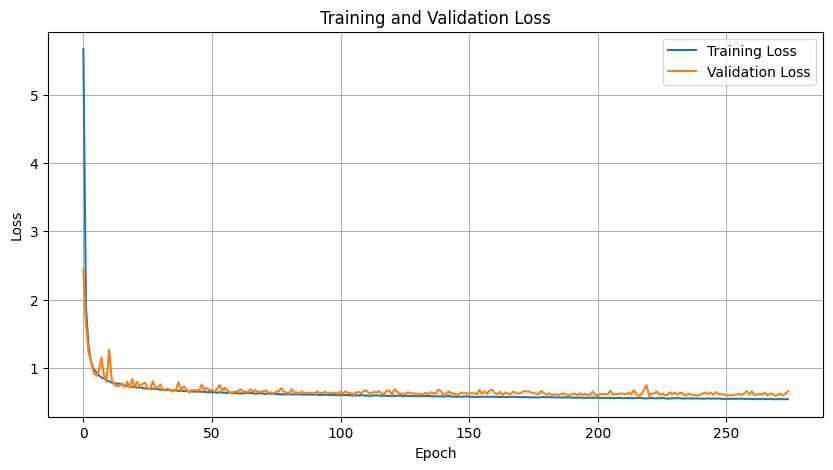

125/125 [==============================] - 1s 3ms/step - loss: 0.5727 - mae: 0.9565 - mse: 1.8906
Validation Loss: 0.5727
Validation MAE: 0.9565
Validation MSE: 1.8906
1/1 [==============================] - 0s 152ms/step - loss: 1.2052 - mae: 1.6705 - mse: 3.5259
Best epoch: 270
Epoch where overfitting begins: 270


In [64]:
#model 31 : using selu activation fn, LeCun initialiser- SGD with momentum and Nesterov
dnn(models[5], opts[3])

Close still overfitting,
Validation Loss: 0.5727,
Validation MAE: 0.9565,
Validation MSE: 1.8906,
Best epoch: 270


##Conclusion
Models that have validation and training loss almost as equal: 15, 16, 20, 21, 25, 29.

####Models with lowest validation loss:

1.   model 15: 5 dense layers with relu activation fn, he initialiser- Adam optimizer with beta1 and beta2-
Validation Loss: 0.6348, Validation MAE: 1.0227, Validation MSE: 2.3197, Best epoch: 271
2.   model 16: 5 dense layers with relu activation fn, he initialiser- SGD momentum optimizer-
Validation Loss: 0.5725, Validation MAE: 0.9566, Validation MSE: 1.6985, Best epoch: 232
3.   model 20: 5 dense layers with relu activation fn, leakyReLU, he initialiser- Adam with beta1 and beta2-
Validation Loss: 0.5896 Validation MAE: 0.9769 Validation MSE: 1.9681 Best epoch: 275
4.   model 21: 5 dense layers with relu activation fn, leakyReLU, he initialiser- Adam with beta1 and beta2- with normalization-
Validation Loss: 0.6187, Validation MAE: 1.0065, Validation MSE: 2.2126, Best epoch: 273
5.   model 25: 5 dense layers with relu activation fn, dropout, he initialiser, L2 regularisation- Adam with beta1 and beta 2-
Validation Loss: 0.6253, Validation MAE: 1.0140, Validation MSE: 2.2336, Best epoch: 273
6.  model 29: 5 dense layers with selu activation fn, LeCun initialiser- Adam with beta1 and beta2-
Validation Loss: 0.6106, Validation MAE: 0.9928, Validation MSE: 2.2061, Best epoch: 273

From a business perspective, although above 6 models are good, we could use the model 16 and 20, which have the minimum validation loss.

In general, the following features in DNN are seen to have good performance:
*   Optimizers: Adam optimizer with beta1, beta2 paramters and SGD with momentum are good.
*   Layers: 5 dense layers
*   Controlling Overfitting: dropout, L2 regularisation
*   Activation fns: relu, leakyReLU, selu
*   Initializers: he initialiser




